In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from markowitz.data import ingest, preprocess
from markowitz.simulate import scenarios, efficient_frontier, portfolio_return
from fidelity import exp_ratio

### Download the ticker data

In [2]:
sd = "2016-01-01"
ed = pd.to_datetime('now').floor('d').strftime('%Y-%m-%d')
tickers = exp_ratio.keys()

data = ingest(tickers, sd, ed)
df = preprocess(data, tickers)

[*********************100%***********************]  208 of 208 completed


In [3]:
print(df.shape)
display(df.head(3))

(1330, 417)


,Date,SVSPX,ESGIX,DSCIX,BSPSX,USSPX,VCAIX,VCITX,VCORX,VGENX,...,FISVX-ret,FNDSX-ret,FTIHX-ret,FSKAX-ret,FXNAX-ret,FITLX-ret,FZIPX-ret,FZILX-ret,FNILX-ret,FZROX-ret
0,2016-01-04,187.440002,NaN,9.22,240.740005,28.740000,11.87,12.24,NaN,40.970001,...,NaN,NaN,NaN,1.001732,0.999131,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,187.800003,NaN,9.23,241.210007,28.799999,11.89,12.26,NaN,40.930000,...,NaN,NaN,NaN,0.986690,1.003478,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,185.399994,NaN,9.13,238.149994,28.430000,11.93,12.30,NaN,39.299999,...,NaN,NaN,NaN,0.975648,1.000867,NaN,NaN,NaN,NaN,NaN


In [4]:
for c in df.columns:
    if df[c].isnull().sum() == 0:
        print(c, 'all_good')
    else:
        print(c, 'missing_data. deleting the column')
        df = df.drop(columns=c)

Date all_good
SVSPX all_good
ESGIX missing_data. deleting the column
DSCIX all_good
BSPSX all_good
USSPX all_good
VCAIX all_good
VCITX all_good
VCORX missing_data. deleting the column
VGENX all_good
VEIPX all_good
VMVFX all_good
VFIIX all_good
VQNPX all_good
VGHCX all_good
VHYAX missing_data. deleting the column
VWEHX all_good
VWAHX all_good
VIPSX all_good
VFICX all_good
VWITX all_good
VFITX all_good
VMLTX all_good
VWESX all_good
VWLTX all_good
VUSTX all_good
VNJTX all_good
VNYTX all_good
VPAIX all_good
VSGBX all_good
VFSTX all_good
VWSTX all_good
VFISX all_good
VUBFX all_good
VWUSX all_good
VWINX all_good
VWNDX all_good
VWNFX all_good
DBIRX all_good
DSPIX all_good
BRLIX all_good
GEQZX all_good
NOBOX all_good
NOEMX all_good
NSRIX all_good
NOINX all_good
NOMIX all_good
NSIDX all_good
NOSIX all_good
NTAUX all_good
NUSFX all_good
BTIAX all_good
PSIFX all_good
PIASX all_good
SNXFX all_good
SFENX all_good
SFREX all_good
SFNNX all_good
SFILX all_good
SFLNX all_good
SFSNX all_good
SWISX all_g

### Simulate and visualize

In [5]:
# 1-year returns for each vehicle across multiple scenarios
# each row is a scenario
rdf = scenarios(df, tickers, exp_ratio, nscenarios=400, ndays=365)
print(rdf.shape)
rdf.head()

(400, 172)


,SVSPX,DSCIX,BSPSX,USSPX,VCAIX,VCITX,VGENX,VEIPX,VMVFX,VFIIX,...,FLCEX,FLGEX,FLVEX,FSMDX,FCHPX,FNCMX,FSRNX,FSSNX,FSKAX,FXNAX
0,0.060758,0.419049,0.289304,0.265841,0.083251,0.103802,0.202414,0.246914,0.109600,-0.017657,...,0.328934,0.344535,0.288501,0.398964,0.051210,0.423520,0.311239,0.475929,0.366145,-0.007019
1,0.014061,-0.108279,0.294986,0.350927,-0.049799,-0.086696,0.013755,-0.010777,-0.035765,0.006989,...,0.339402,0.593777,0.124041,0.128616,-0.023424,0.628369,-0.199146,0.158744,0.278978,-0.004241
2,0.188117,0.292569,0.593610,0.587114,-0.011540,-0.013382,0.736992,0.345071,0.277911,-0.012633,...,0.541280,0.694082,0.441164,0.550206,-0.015399,0.790044,0.071671,0.486501,0.603033,-0.022136
3,-0.004330,0.009691,0.150814,0.186160,-0.022992,-0.051164,-0.158433,-0.130026,-0.031910,0.008954,...,0.116523,0.256144,-0.034588,0.107492,-0.032581,0.369917,-0.093044,-0.000785,0.156668,-0.019090
4,0.095767,0.251194,0.418892,0.487591,0.029312,0.041243,-0.207924,0.271233,0.275957,-0.005972,...,0.497159,0.562883,0.383761,0.452989,0.000787,0.516150,0.101776,0.278985,0.422301,0.001219


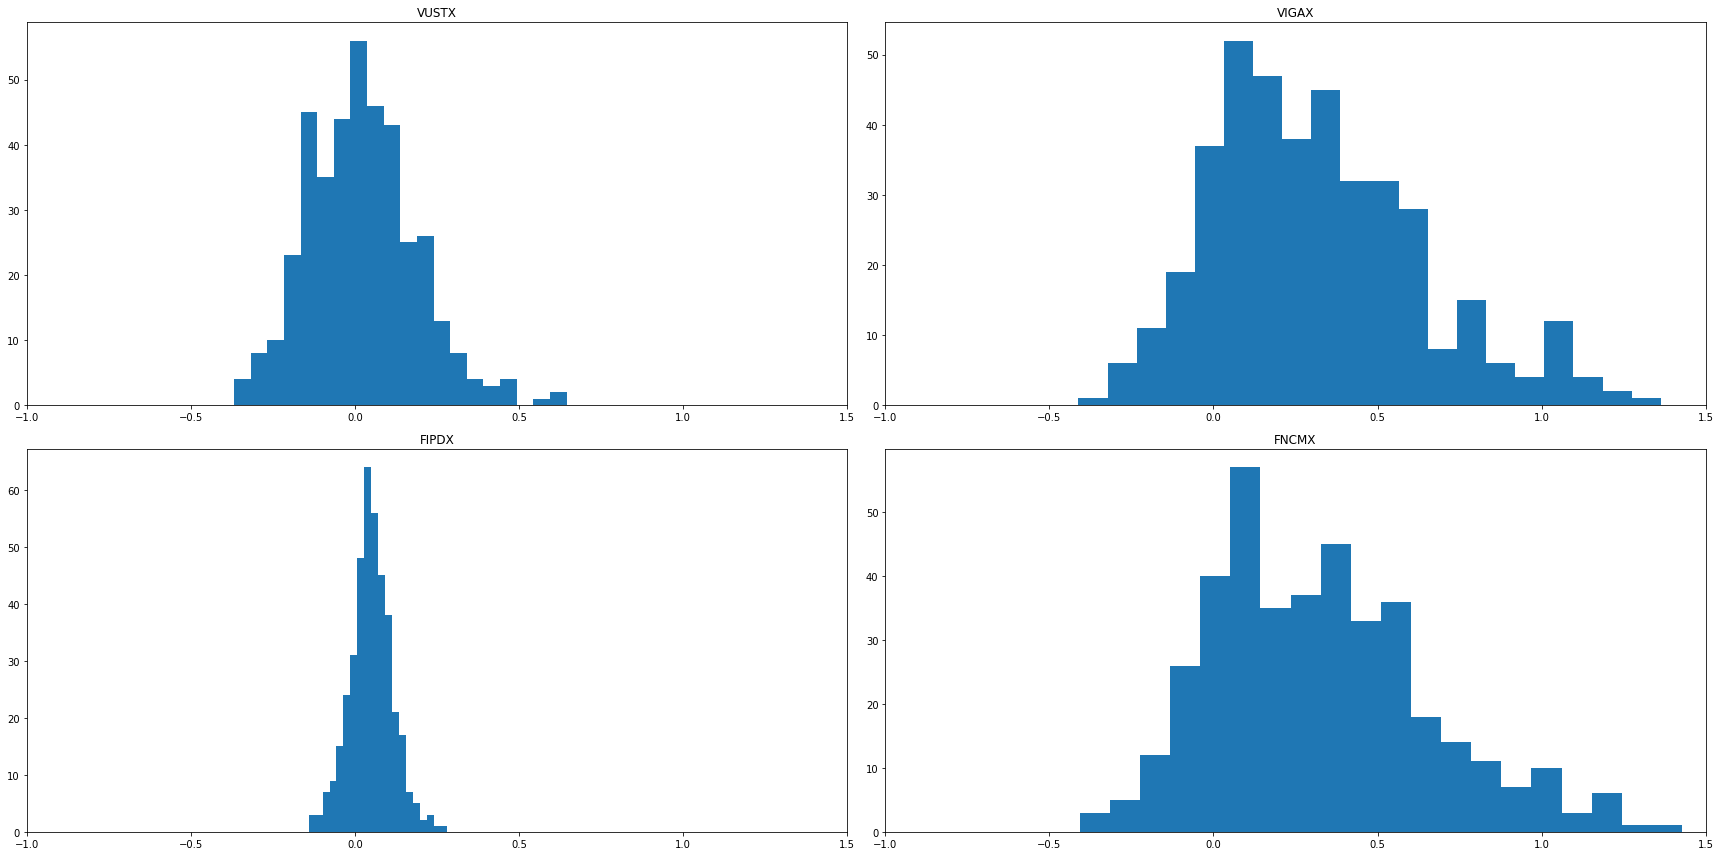

In [9]:
assets = ["VUSTX","VIGAX","FIPDX","FNCMX"]

fig = plt.figure(figsize=(24, 12))
ctr = 0
for i in range(len(assets)):
    plt.subplot(2,2,i+1)
    plt.hist(rdf[assets[i]], bins=20)
    plt.xlim([-1,1.5])
    plt.title(assets[i])

plt.tight_layout()
plt.show()

### Optimize

In [7]:
from markowitz.optimize import optimize

In [8]:
min_ratio = 0.3 # minimum expense ratio
min_assets = 1 # minimum assets in the portfolio
max_risk = [0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01, 0.005] # max risk of negative returns

res_list = []
for m in max_risk:
    obj, wopt, orisk = optimize(rdf, exp_ratio, m, min_ratio, min_assets)
    wopt.update({'return':obj, 'risk': orisk})
    res_list.append(wopt)

resdf = pd.DataFrame(res_list)

col_list = {}
for i, c in enumerate(rdf.columns):
    col_list[i] = c

resdf = resdf.rename(columns=col_list)

collist = []
for c in resdf.columns:
    if resdf[c].sum() > 0:
        collist.append(c)

resdf[collist]

/Users/anshulagarwal/opt/anaconda3/envs/aag/lib/python3.7/site-packages/pulp/pulp.py:1114: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


,VUSTX,VIGAX,FIPDX,FNCMX,return,risk
0,0.000000,0.000000,0.000000,1.000000,32.102170,0.017022
1,0.000000,0.000000,0.000000,1.000000,32.102170,0.017022
2,0.000000,0.000000,0.000000,1.000000,32.102170,0.017022
3,0.000000,0.000000,0.000000,1.000000,32.102170,0.017022
4,0.000000,0.000000,0.000000,1.000000,32.102170,0.017022
5,0.000000,0.000000,0.000000,1.000000,32.102170,0.017022
6,0.000000,0.000000,0.000000,1.000000,32.102170,0.017022
7,0.042504,0.404181,0.000000,0.553314,30.499477,0.015000
8,0.042887,0.389154,0.206385,0.361574,24.885507,0.010000
9,0.000000,0.065050,0.507003,0.427947,18.256105,0.005000


In [12]:
w = {}
for k in exp_ratio.keys():
    w[k] = 0

w['VUSTX'] = 0.05
w['VIGAX'] = 0.4
w['FIPDX'] = 0.2
w['FNCMX'] = 0.5

pdf, perc_neg_scenarios, avg_neg_return, avg_return = portfolio_return(rdf, w)
print(perc_neg_scenarios, avg_neg_return, avg_return)

0.1325 -0.009962612413589277 0.24837229749610742
